# Imputed Dataset Visualizations

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Read In Dataset

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [3]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


<hr>

# <center>Objective 1</center>
## <center>Business Understanding:</center>

<hr>

###  <span style = "color:blue"> A) Describe the purpose of the data set you selected (why was it collected in the first place?).</span>

#### - The data (fictional) is comprised of scores from three tests of students at a public school along with a variety of personal and socio-economic factors which may contain interaction effects. <br><br>
#### - We assume that this data was collected to identitfy potential relationships between personal and socio-economic factors that could help to predict and better understand which factors affect test scores most. With this knowledge educators, parents and students can focus their attention towards variables which can potentially help students earn higher testing scores.  

###  <span style = "color:blue">B) Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?</span>

#### - The importance of student education and testing scores are of the utmost importance. Education is the foundation upon which students will build their future on. If we are able to identify factors that could assist in making a more efficient learning and testing experiece it will impact the future positively for many students.<br><br>
#### - We will know if we have mined useful knowledge from the dataset if we are able to identify patterns and significant relationships that help us in identifying student performance factors.

### <span style = "color:blue">C) How would you measure the effectiveness of a good prediction algorithm? Be specific.</span>

#### - The importance of student education and testing scores are of the utmost importance. Education is the foundation upon which students will build their future on. If we are able to identify factors that could assist in making a more efficient learning and testing experiece it will impact the future positively for many students.<br><br>
#### - We will know if we have mined useful knowledge from the dataset if we are able to identify patterns and significant relationships that help us in identifying student performance factors.

<hr>

# <center>Objective 2</center>

## <center>Data Understanding</center>

<hr>

**First we want to see how many null values we're dealing with in each columns, so we can get a general idea.**

In [4]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

**Next after exploring the data, we decide that it is best to impiute the null values with the most frequent value that appears in each respective column.**

In [5]:
imputed_df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [6]:
imputed_df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [7]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Creating Function

**We find that we will be creating the same type of visualization for all of the imputed variable, so we decided to create a function for it, rather than rewrite the code multiple times.**

In [8]:
def plot_imputed(col):
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

    sns.boxplot(ax=axes[0,0], data = imputed_df, x = col, y = "MathScore")
    sns.boxplot(ax = axes[0,1], data = imputed_df, x = col, y = "ReadingScore")
    sns.boxplot(ax=axes[1,0], data = imputed_df, x = col, y = "WritingScore")
    sns.countplot(ax=axes[1,1], x=col, data=imputed_df)

    axes[0,0].set_title(f"Math Scores by {col}")
    axes[0,1].set_title(f"Reading Scores by {col}")
    axes[1,0].set_title(f"Writing Scores by {col}")
    axes[1,1].set_title(f"{col} Count")

    plt.tight_layout()

    plt.show()

In [9]:
def plot_imputed_violin(col):
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

    sns.violinplot(ax=axes[0,0], data = imputed_df, x = col, y = "MathScore")
    sns.violinplot(ax = axes[0,1], data = imputed_df, x = col, y = "ReadingScore")
    sns.violinplot(ax=axes[1,0], data = imputed_df, x = col, y = "WritingScore")
    sns.countplot(ax=axes[1,1], x=col, data=imputed_df)

    axes[0,0].set_title(f"Math Scores by {col}")
    axes[0,1].set_title(f"Reading Scores by {col}")
    axes[1,0].set_title(f"Writing Scores by {col}")
    axes[1,1].set_title(f"{col} Count")

    plt.tight_layout()

    plt.show()

## Visualizations of Columns with Imputed Values

### 1) Parent Edu/Scores

### Parent Eduction / Test Score Vizualization Explained: 

Parent Eduction Level has a visual relationship in when looking at increasing/decreaseing median test scores for various higher/lower levels of education. <br><br>
**Visual Interpretation**
The boxplot above illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
Overall: We can see that the median test score increases as we "increase" in eduction level.  
<br><br>
**Why the Visual is Appropriate:**
A box plot is a good visual for comparing education levels against test scores because it displays the distribution of scores for each level of education in a compact and intuitive way. The box represents the interquartile range (IQR) of the data, with the median (50th percentile) represented as a horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, while any data points outside this range are represented as individual dots. This allows for easy comparison of the distribution of test scores for different levels of education, as well as identifying potential outliers or extreme values.
<br><br>

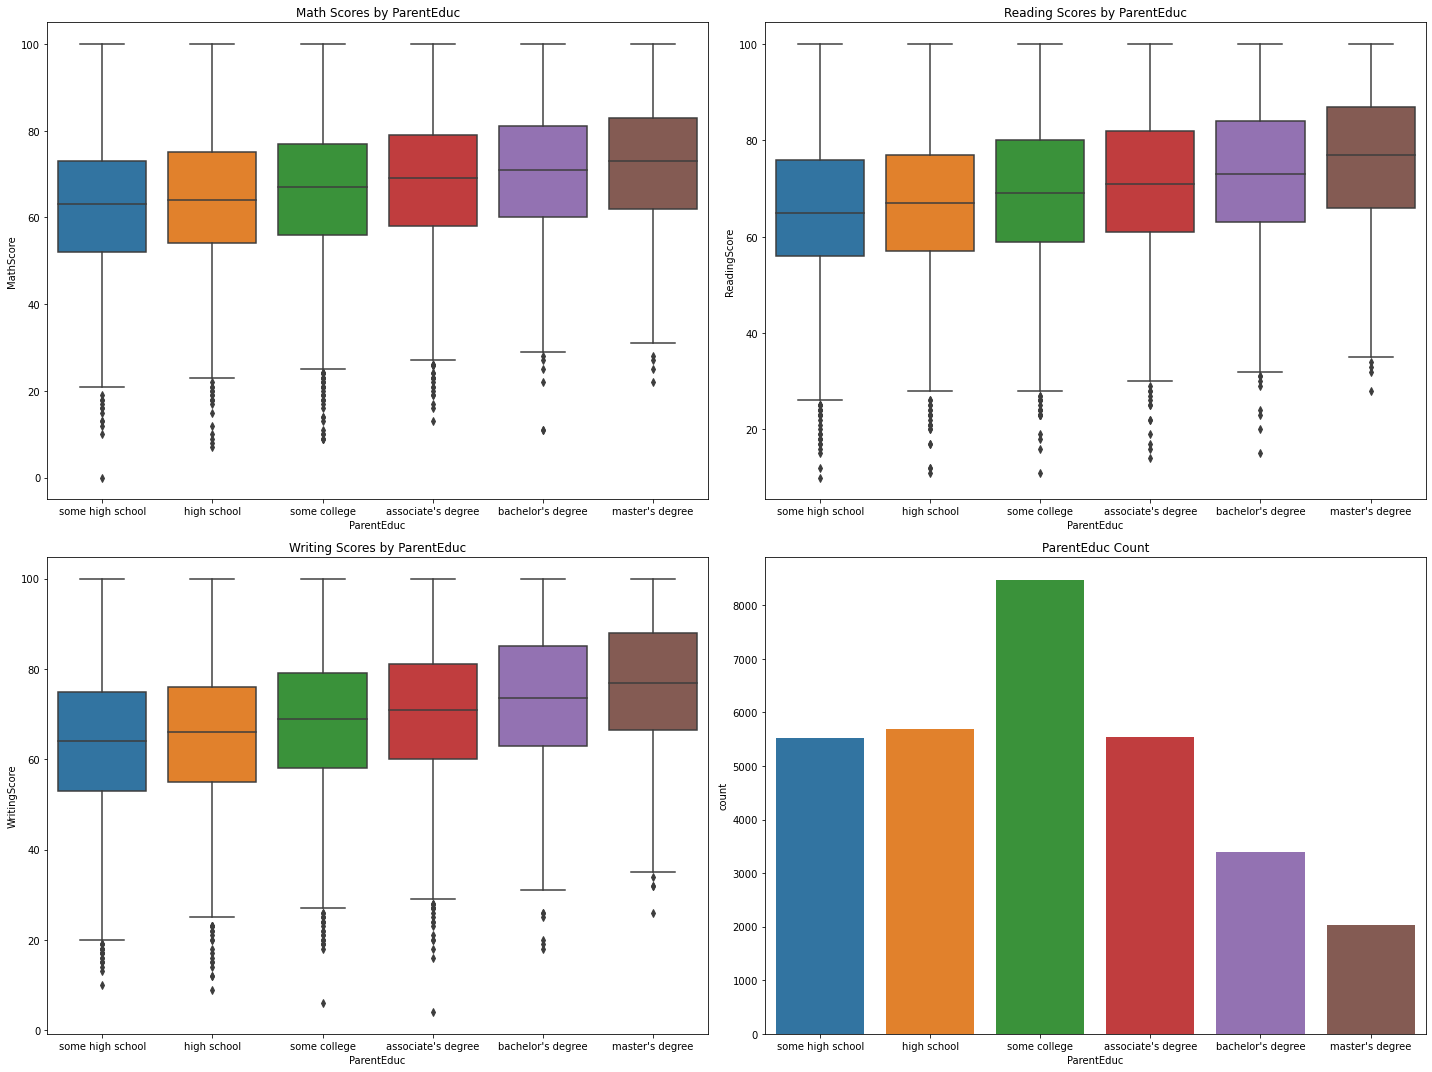

In [38]:
imputed_df["ParentEduc"] = imputed_df["ParentEduc"].astype('category')
imputed_df["ParentEduc"] = imputed_df["ParentEduc"].cat.reorder_categories(["some high school","high school", 
                                                                            "some college", "associate's degree", "bachelor's degree", "master's degree"])

plot_imputed("ParentEduc")

### 2) Ethnic Group/Scores

### Ethnics Group / Test Score Vizualization Explained: 
Ethnic Group shows visual evidence of a slight increase in median scores across the difference groups. Interestingly we can see that Group E has a visually distinct increase in median test scores for Math. <br><br>
**Visual Interpretation**
The plot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
Overall: We can see that the median test score increases as we move along the ethnic groups by alphabetical order. Group E, however, has a median tha seems to increase dramatically from group D.
<br><br>
**Why the Visual is Appropriate:**
A violinplot is a wonderful comparing ethnic group against test scores because it displays the distribution of scores for each ethnic group in a compact and intuitive way. As seen above, while those Group A-C and those who didn't specify their ethnicity generally have the same boxplot, we find that those in group D & E have a higher median score than the rest. The highest is group E. Another interesting discovery to note is the number of outliers in group C.
<br><br>

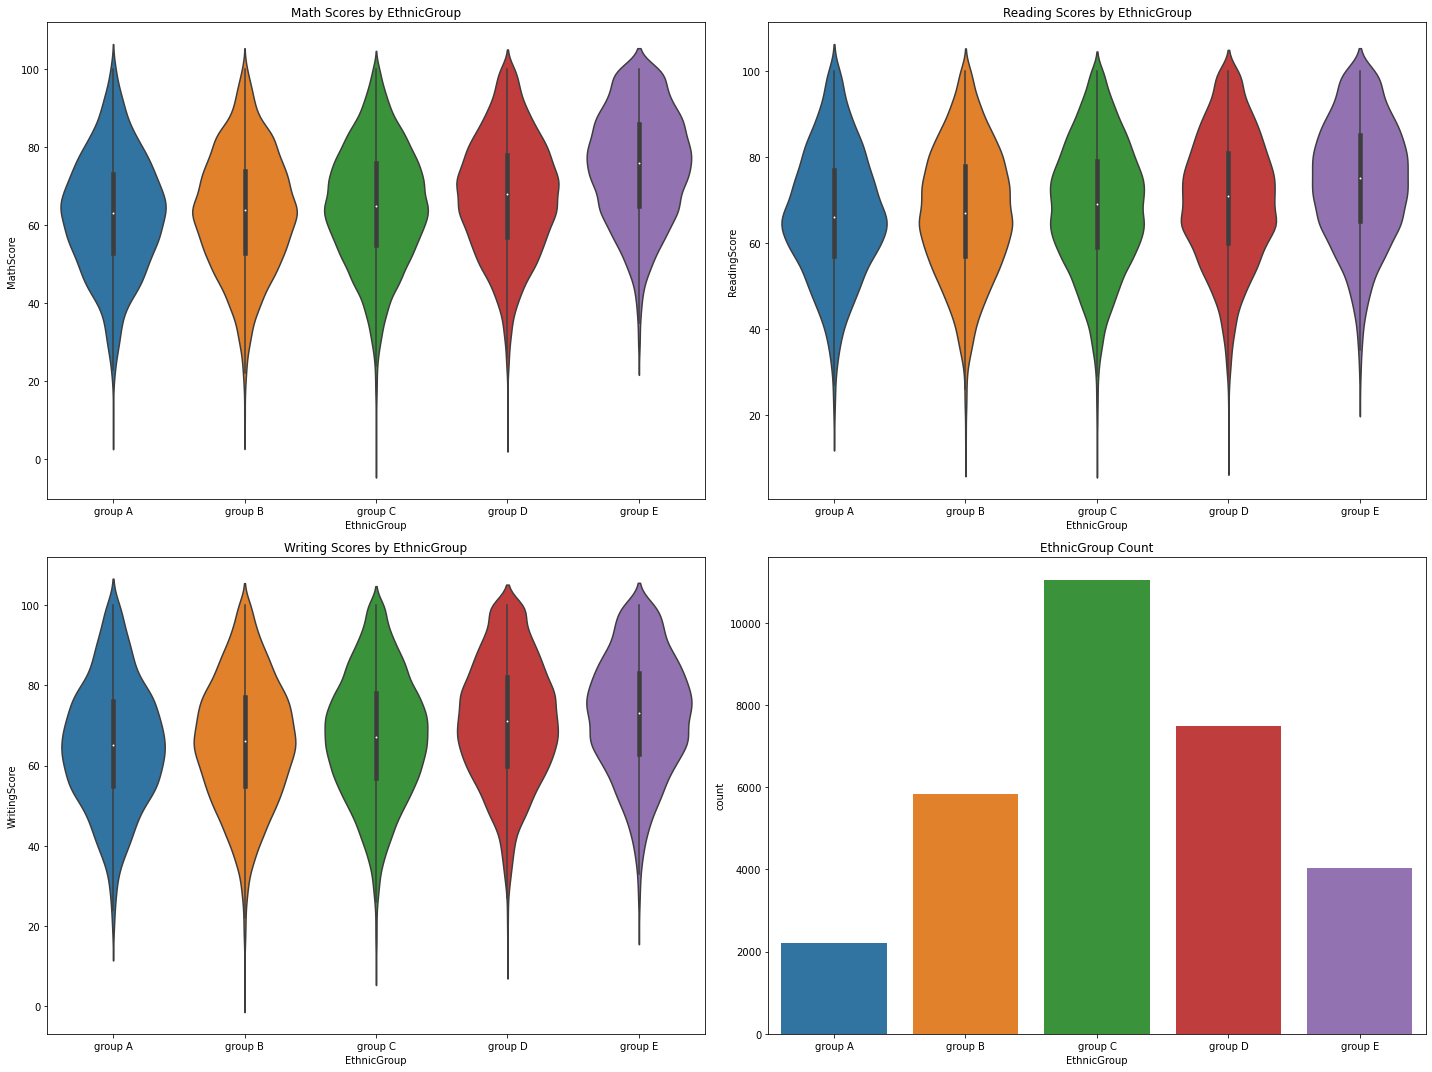

In [36]:
imputed_df['EthnicGroup'] = imputed_df['EthnicGroup'].astype('category')
imputed_df["EthnicGroup"].cat.reorder_categories(["group A","group B", "group C", "group D", "group E"])


plot_imputed_violin("EthnicGroup")

### 3) Test Prep/Scores

### Test Prep  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The boxplot illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
As expected, those who have completed their test prep have a higher median score than those who did none of the test prep which doesn't come as a surprise.
<br><br>

**Why the Visual is Appropriate:**
A boxplot is an appropriate visual for comparing the test scores for groups who did/didn't participate in test prep. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.


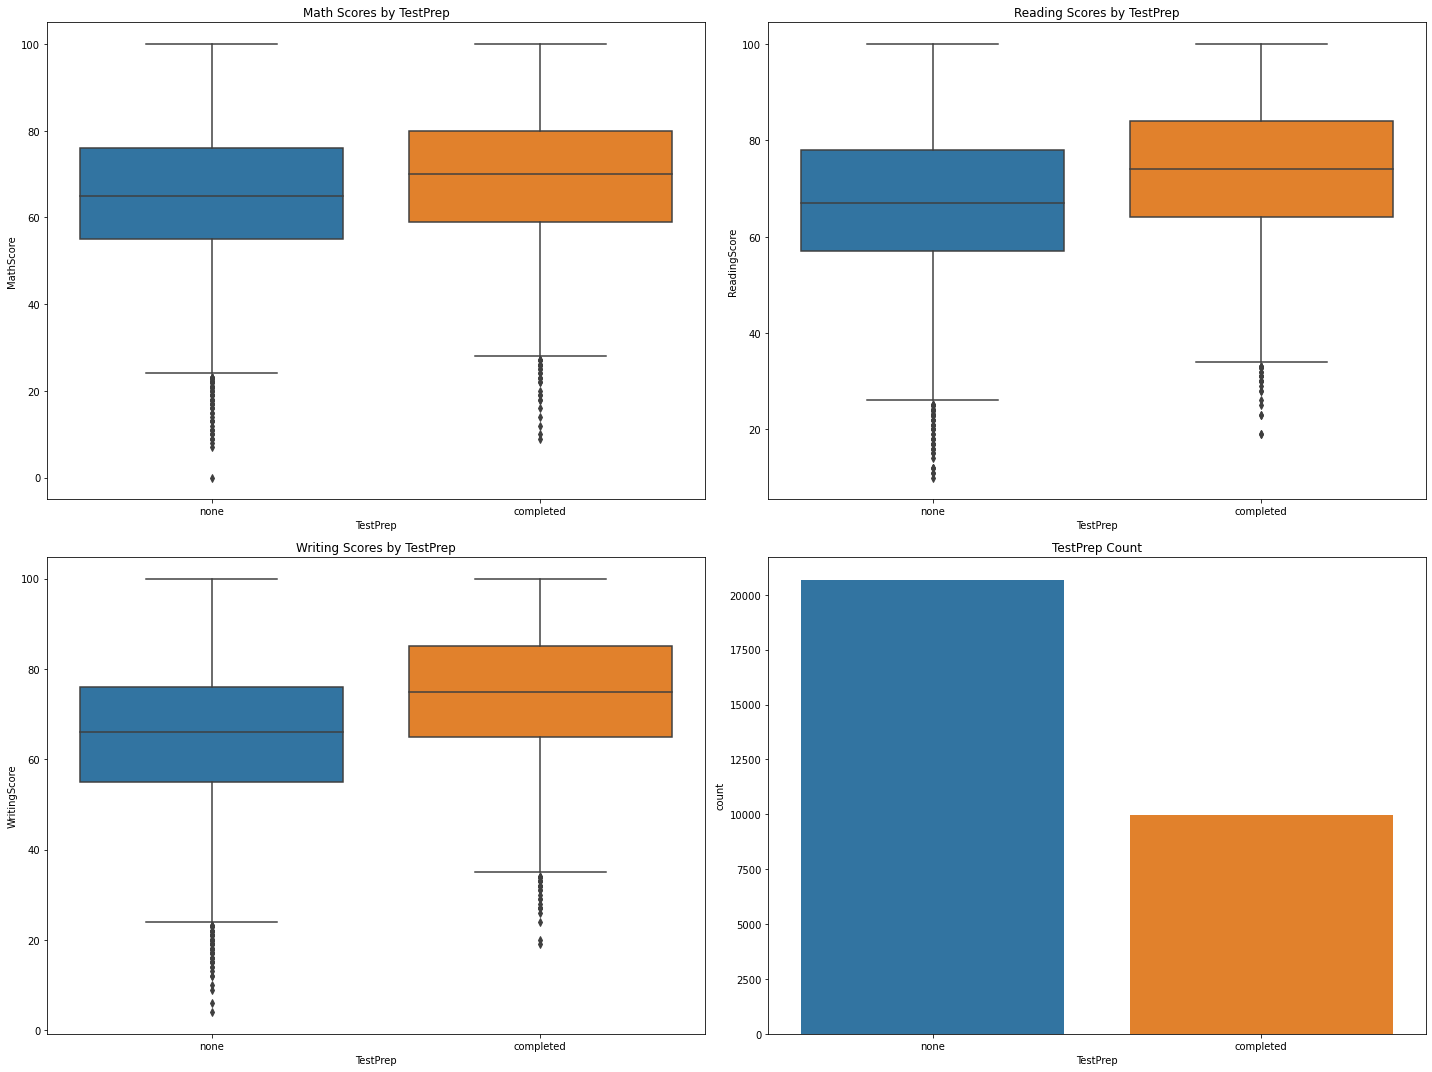

In [12]:
plot_imputed("TestPrep")

### 4) Marital Status/Scores

### Parent Marital Status  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The boxplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
Visually there seems to be no significant difference in score performance between each of the groups. As an additional takeaways we can see that most of the parents fall into the category of Married, followed by Single, and Divorced. 
<br><br>

**Why the Visual is Appropriate:**
A violinplot is an appropriate visual for comparing the student test scores based on groups their parents marital status. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.


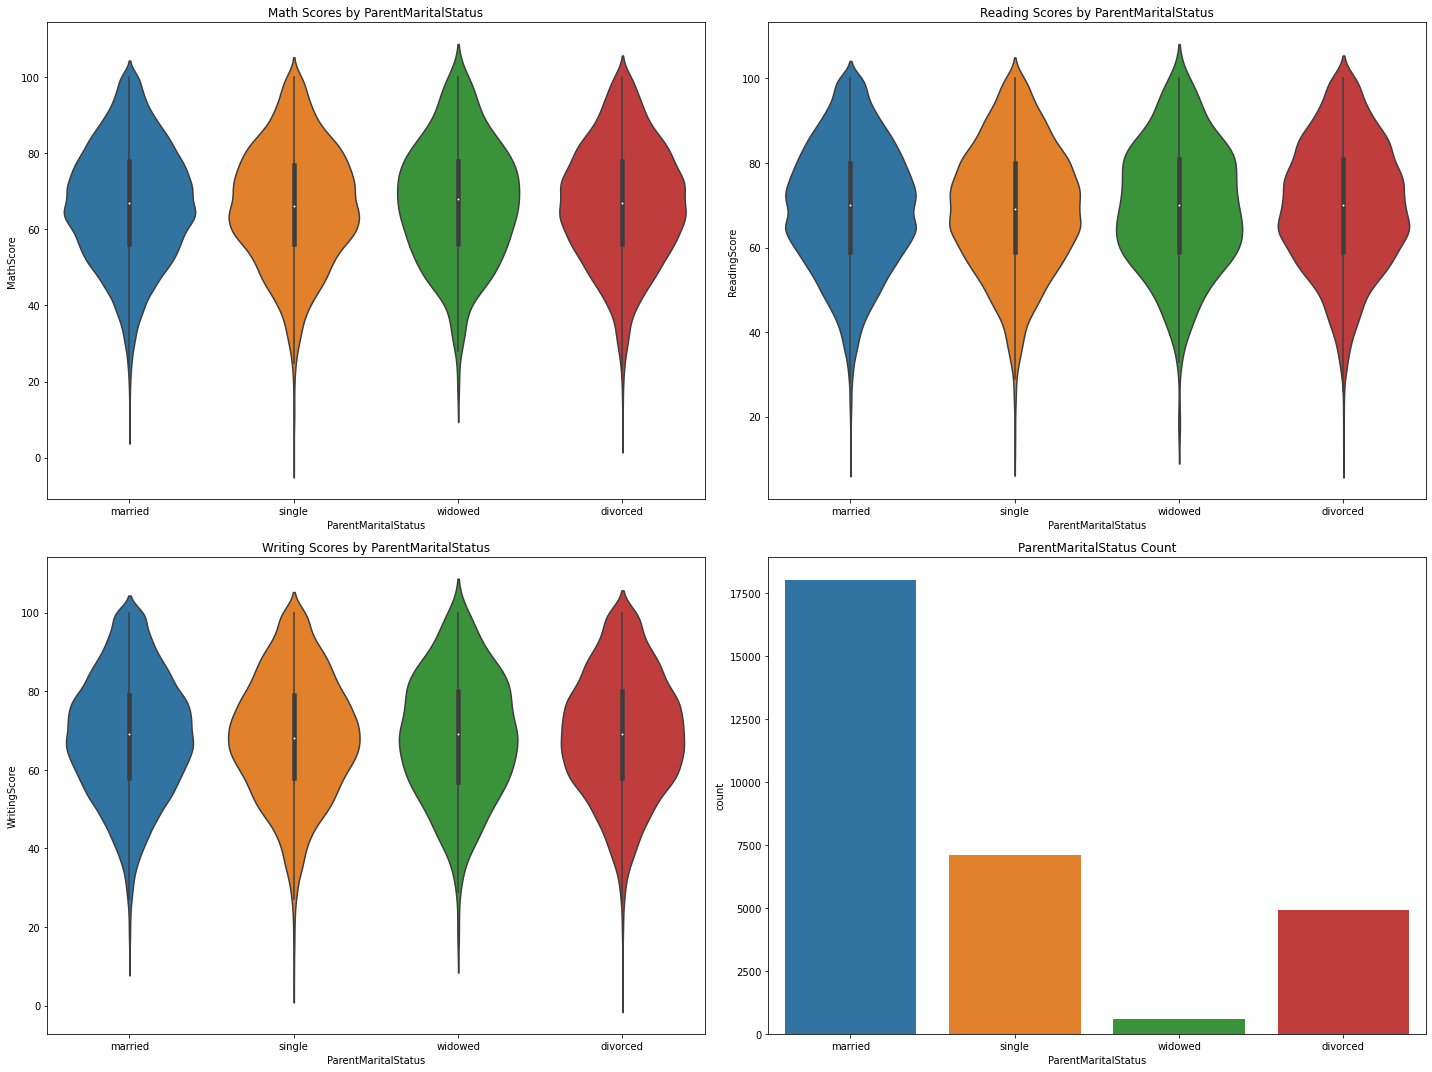

In [13]:
plot_imputed_violin("ParentMaritalStatus")

### 5) PracticeSport/Scores

### PracticeSport  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The boxplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
Visually there seems to show a decreasing median when analyzing whether or not a student participate in sports. The less someone participate in sports, the lower their scores is. However, when we look at the countplot, we find that the number if those who checked "never" is significantly lower than the other two. This is something to keep in mind. 
<br><br>

**Why the Visual is Appropriate:**
A boxplot is an appropriate visual for comparing the student test scores based on groups their parents marital status. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.


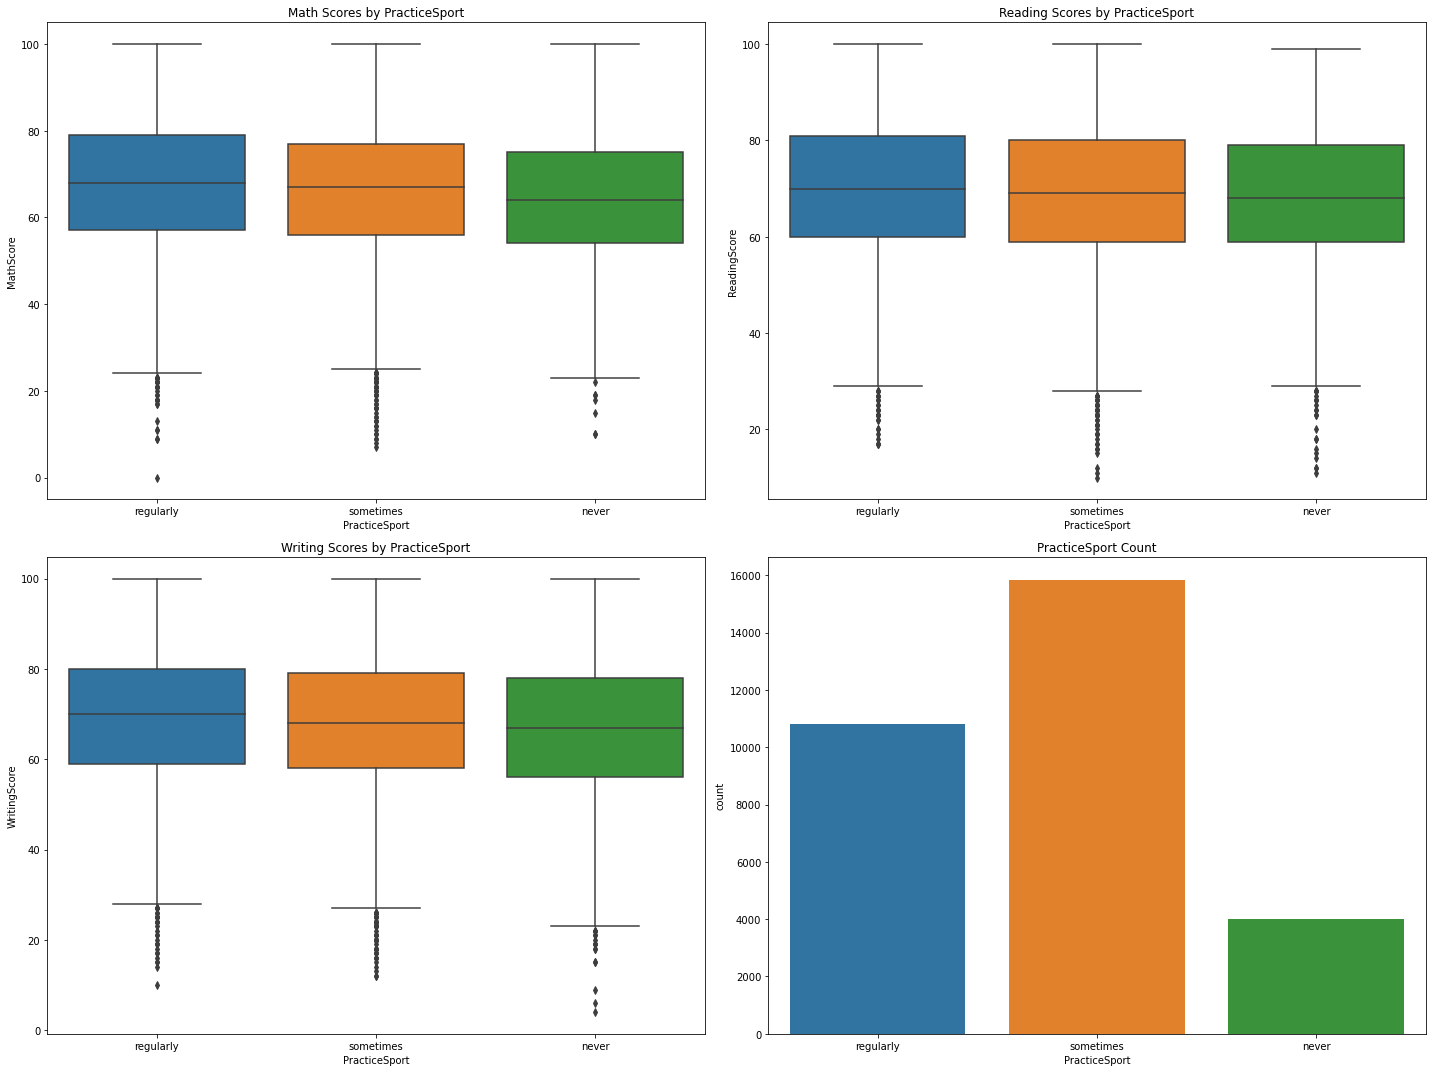

In [14]:
plot_imputed("PracticeSport")

### 6) IsFirstChild/Scores

### PracticeSport  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The violinplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
There doesn't seem to be much of a difference in test scores across the different types of exam when comparing whether or not a student is the first child. However, we should also note that the number of "No" is half of "Yes".
<br><br>

**Why the Visual is Appropriate:**
A boxplot is an appropriate visual for comparing the student test scores based on groups their parents marital status. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.

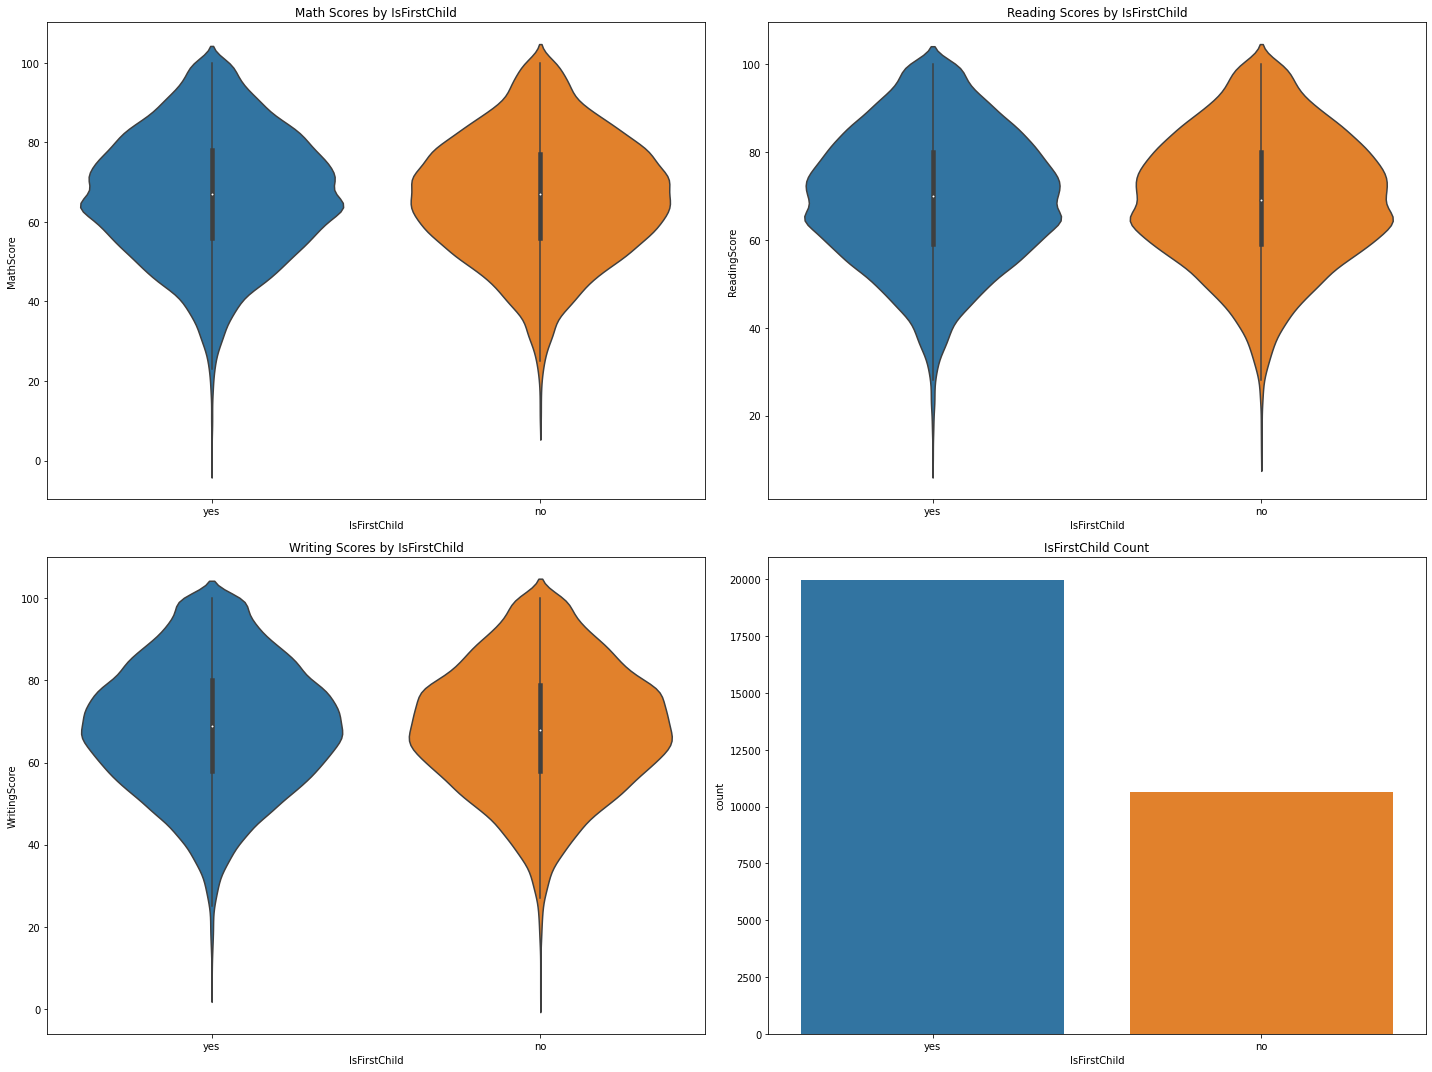

In [15]:
plot_imputed_violin("IsFirstChild")

### 7) NrSiblings/Scores

**Visual Interpretation**
The boxplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
There doesn't seem to be much of a difference in test scores across the different types of exam when comparing the number of sibling one have. However, we should also keep in mind that the count of each number of sibling is vastly different from one another. For example, the number of sibling for those with only one sibling is nearly 10 times that with 6 or 7 siblings.
<br><br>

**Why the Visual is Appropriate:**
A boxplot is an appropriate visual for comparing the student test scores based on groups their parents marital status. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.

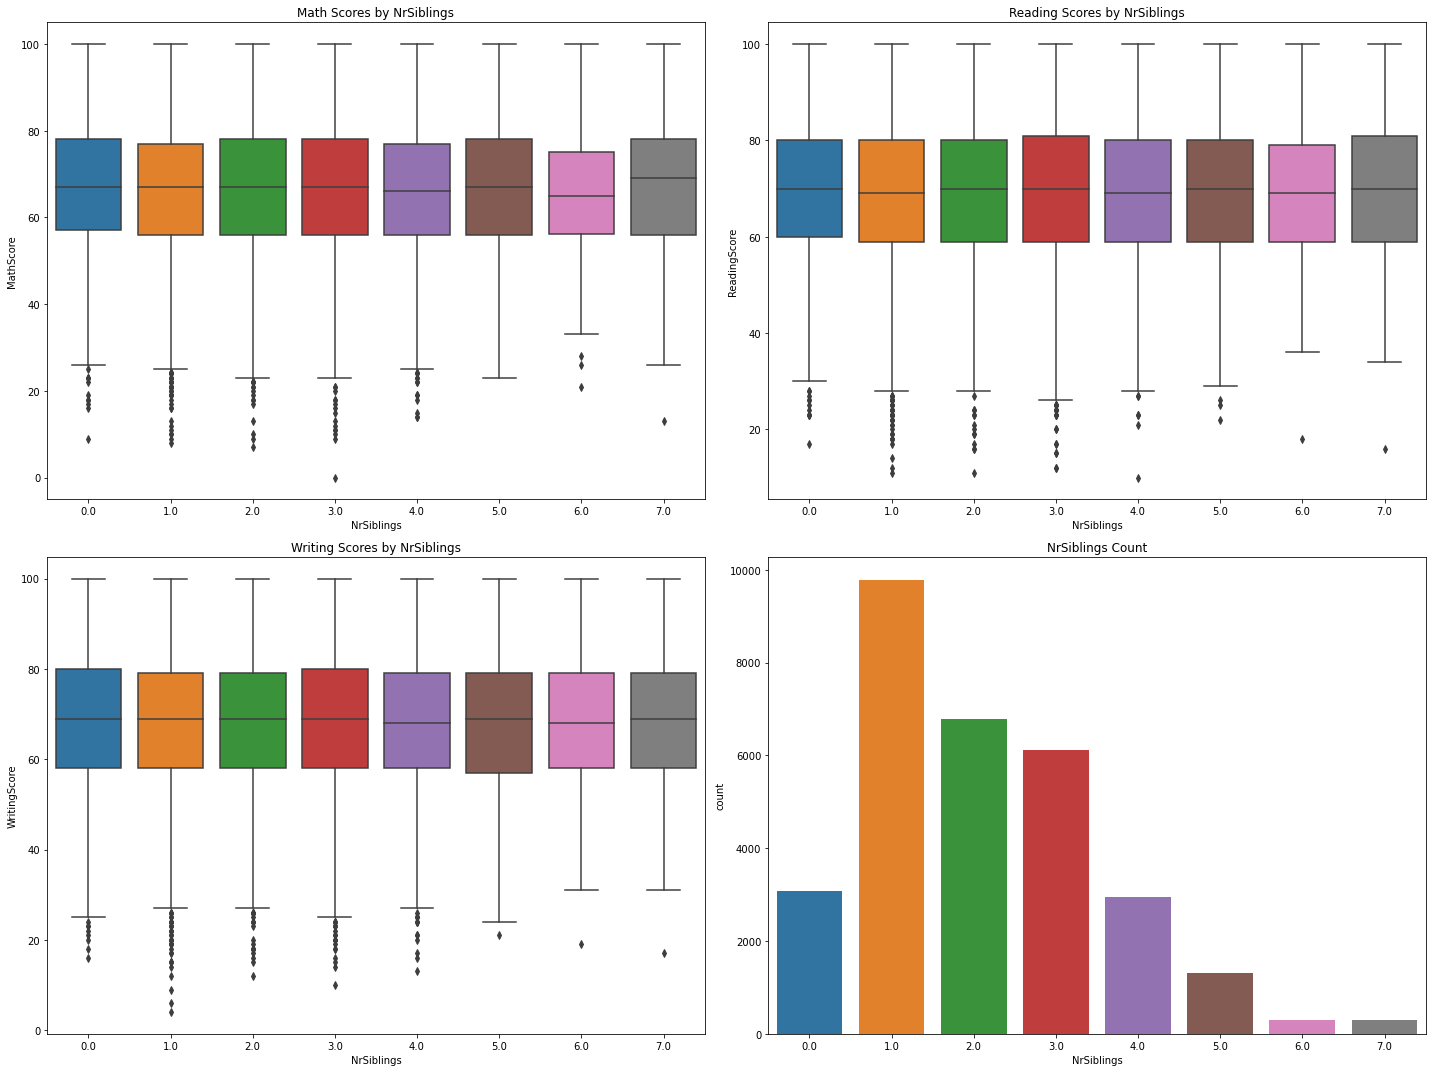

In [16]:
plot_imputed("NrSiblings")

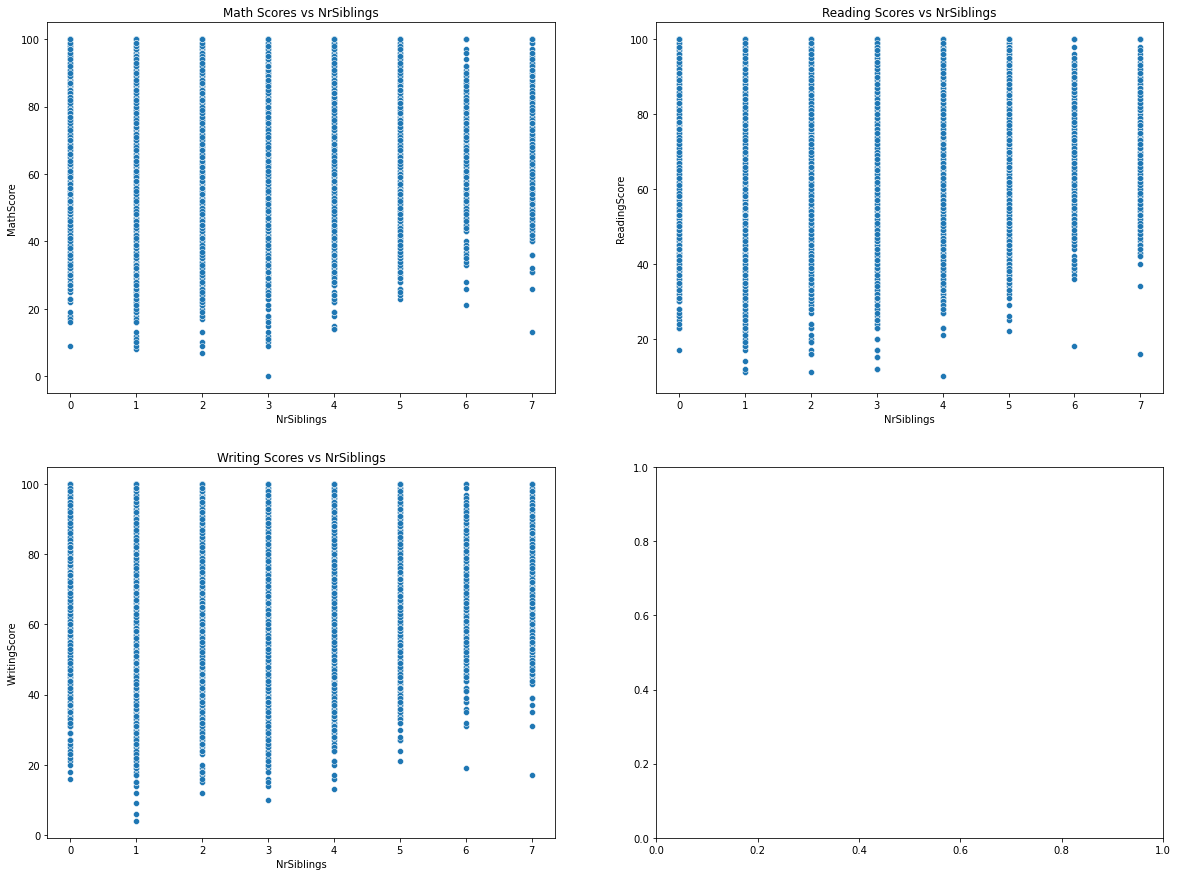

In [41]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

sns.scatterplot(ax=axes[0,0], data = imputed_df, x = "NrSiblings", y = "MathScore")
sns.scatterplot(ax = axes[0,1], data = imputed_df, x = "NrSiblings", y = "ReadingScore")
sns.scatterplot(ax=axes[1,0], data = imputed_df, x = "NrSiblings", y = "WritingScore")

axes[0,0].set_title(f"Math Scores vs NrSiblings")
axes[0,1].set_title(f"Reading Scores vs NrSiblings")
axes[1,0].set_title(f"Writing Scores vs NrSiblings");

### 8) TransportMeans/Scores

### TransportMeans  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The violinplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
There doesn't seem to be much of a difference in test scores across the different types of exam when comparing whether or not a student takes a school bus or has a private mode of transportation. 
<br><br>

**Why the Visual is Appropriate:**
A boxplot is an appropriate visual for comparing the student test scores based on groups their parents marital status. The graphic provides a clear and concise summary of the distribution of the data for each group. By plotting the boxplots side by side, we can easily compare the central tendency, spread, and skewness of the test scores for each group. Additionally, boxplots can effectively display potential outliers and extreme values in the data, which can be helpful in identifying differences between the groups. Overall, boxplots can provide a useful visual summary of the distribution of the data and help us compare the performance of the test prep groups.

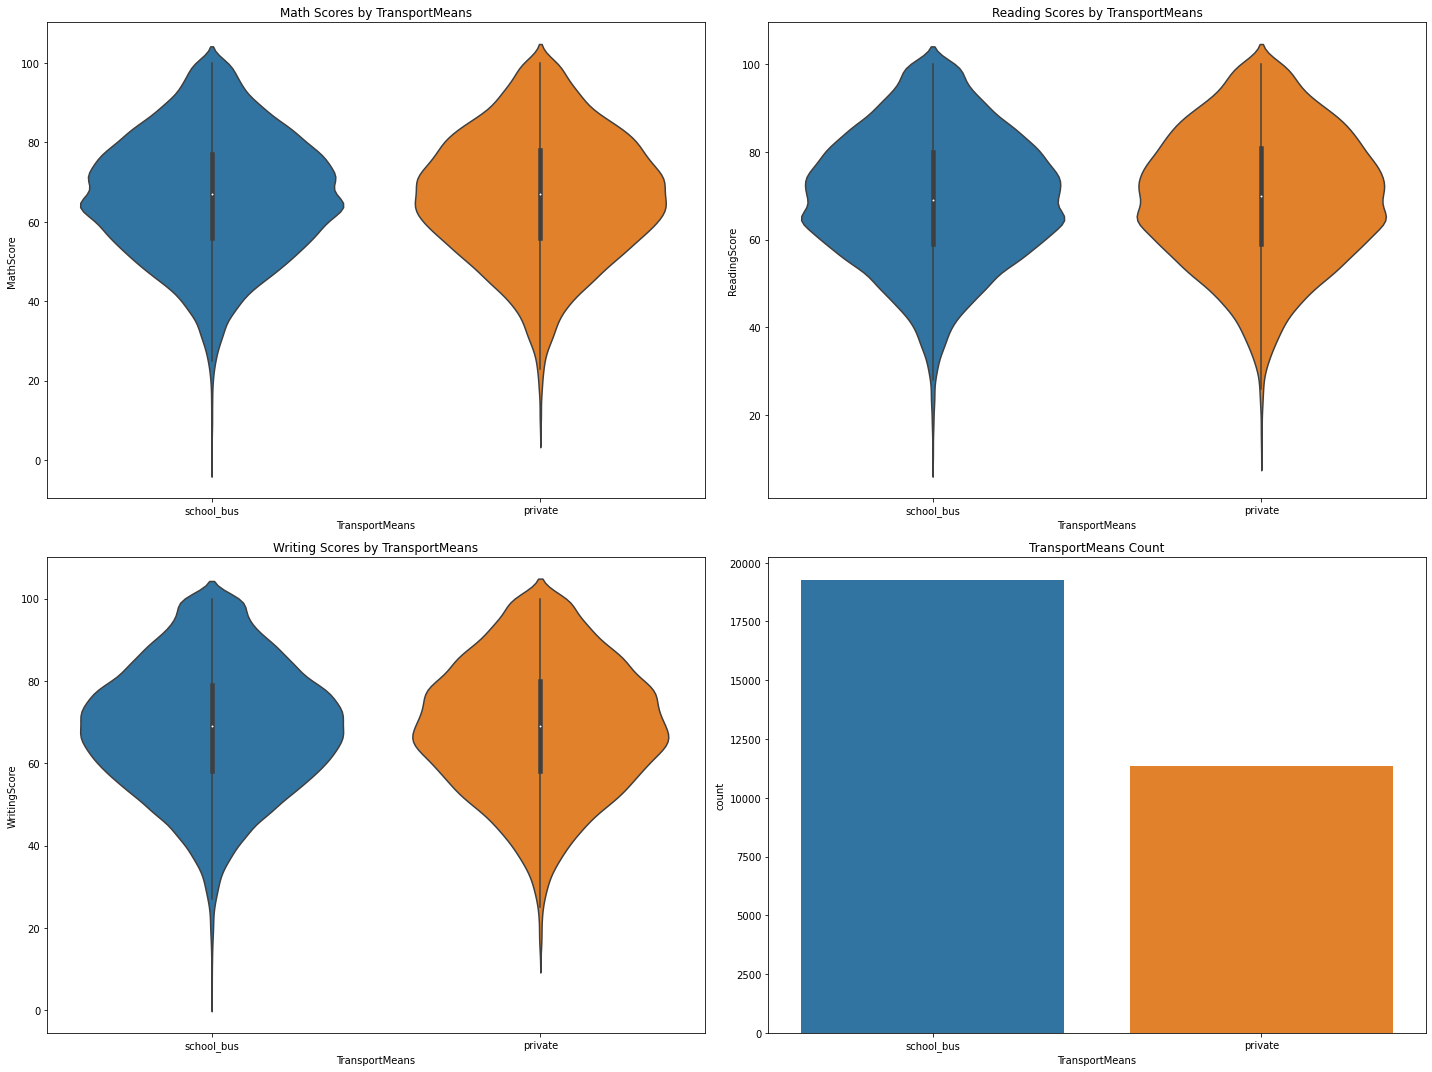

In [17]:
plot_imputed_violin('TransportMeans')

### 9) WklyStudyHours/Scores

### Weekly Study Hours  / Test Score Vizualization Explained: 
<br>

**Visual Interpretation**
The boxplot below illustrates the distribution of test score and shows the median, quartiles, and outliers of the data. It provides a quick visual summary of the central tendency, spread, and skewness of the data.
<br>*Visual Takeaways:* <br>
As we can see from our count plot, most of the students study about 5-10 hours every week and the second highest studies less than 5 hours every week. It seems like that those who spend more time studying achieve higher scores, which isn't surprising. 

When we look at reading and writing score, we do not see much of a difference in the median score regardless of the number of hours studied. However, we see a slight uptick in the median in math score for those who've studied more than 10 hours.
<br><br>

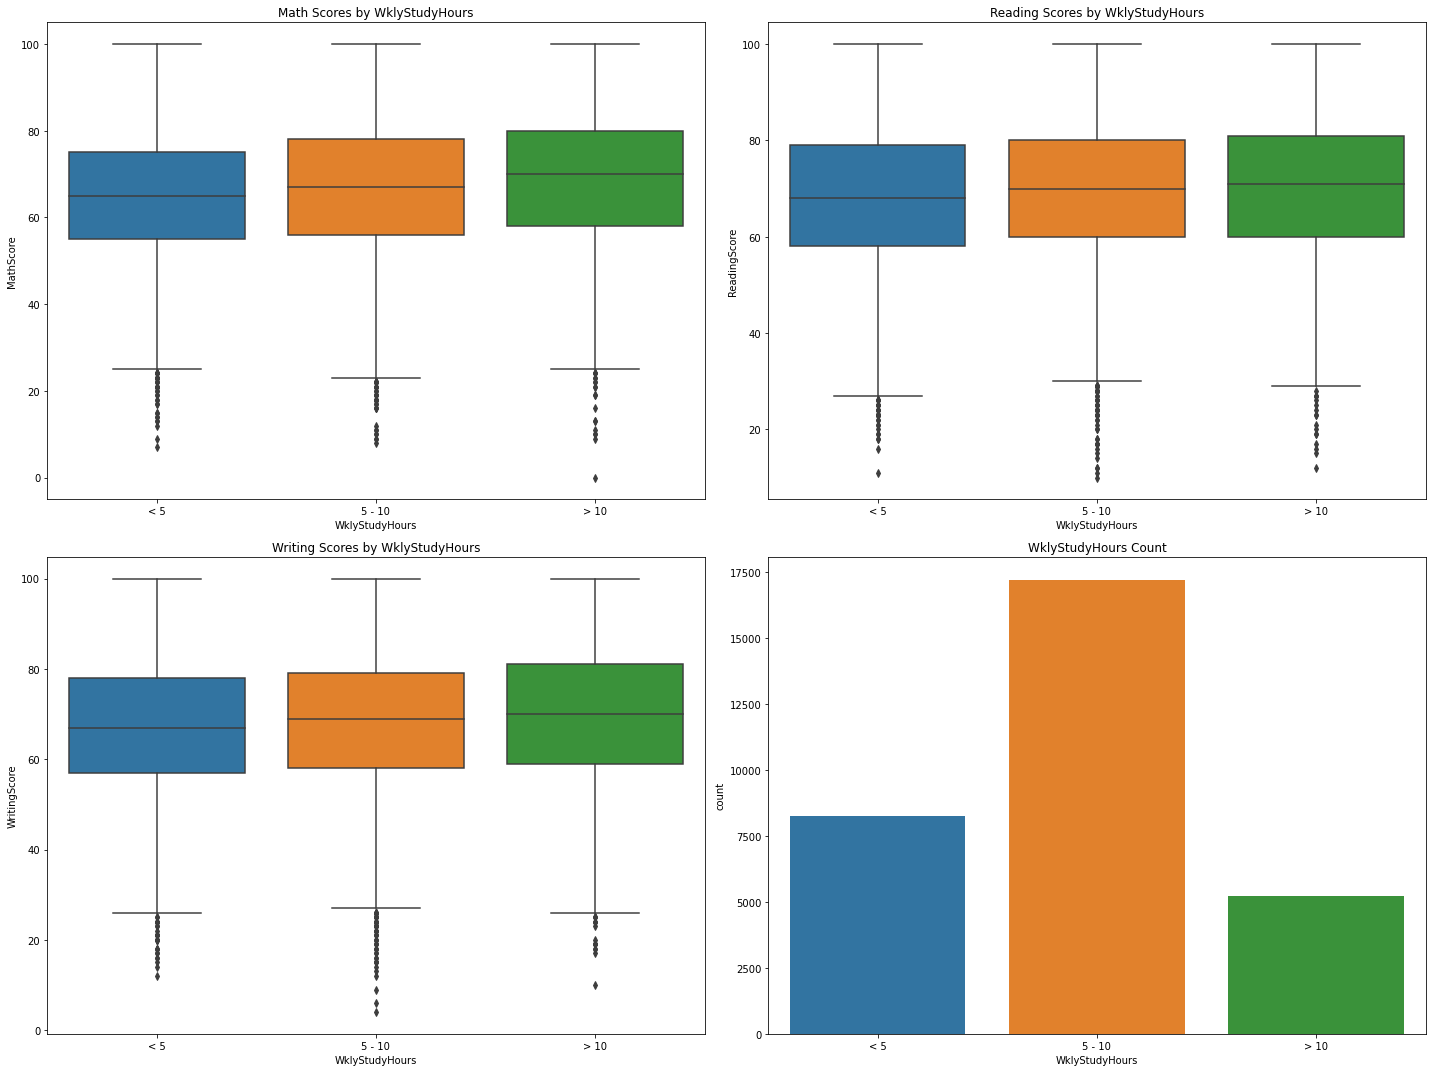

In [18]:
plot_imputed("WklyStudyHours")

## Decision Tree on Imputed Data

In [19]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Separate the input features (including the categorical variables) and the response variables
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)  # Input features
y_math = df['MathScore']  # Math score as the response variable
y_reading = df['ReadingScore']  # Reading score as the response variable
y_writing = df['WritingScore']  # Writing score as the response variable

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math, y_train_reading, y_test_reading, y_train_writing, y_test_writing = train_test_split(
    X, y_math, y_reading, y_writing, test_size=0.2, random_state=42
)

# Identify the categorical columns with missing values
categorical_cols_with_missing = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

# Impute missing values in categorical columns with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[categorical_cols_with_missing]), columns=categorical_cols_with_missing)
X_test_imputed = pd.DataFrame(imputer.transform(X_test[categorical_cols_with_missing]), columns=categorical_cols_with_missing)

# Perform one-hot encoding on the imputed categorical variables
X_train_encoded = pd.get_dummies(X_train_imputed, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_imputed, drop_first=True)

# Initialize and fit the decision tree model for MathScore prediction
model_math = DecisionTreeRegressor(random_state=42)
model_math.fit(X_train_encoded, y_train_math)

# Evaluate the MathScore model on the testing set
y_pred_math = model_math.predict(X_test_encoded)
mse_math = mean_squared_error(y_test_math, y_pred_math)
print("MathScore Mean Squared Error:", mse_math)

# Analyze feature importance for MathScore model
feature_importances_math = model_math.feature_importances_
# The importance values will correspond to the encoded columns in X_train_encoded

# Initialize and fit the decision tree model for ReadingScore prediction
model_reading = DecisionTreeRegressor(random_state=42)
model_reading.fit(X_train_encoded, y_train_reading)

# Evaluate the ReadingScore model on the testing set
y_pred_reading = model_reading.predict(X_test_encoded)
mse_reading = mean_squared_error(y_test_reading, y_pred_reading)
print("ReadingScore Mean Squared Error:", mse_reading)

# Analyze feature importance for ReadingScore model
feature_importances_reading = model_reading.feature_importances_
# The importance values will correspond to the encoded columns in X_train_encoded

# Initialize and fit the decision tree model for WritingScore prediction
model_writing = DecisionTreeRegressor(random_state=42)
model_writing.fit(X_train_encoded, y_train_writing)

# Evaluate the WritingScore model on the testing set
y_pred_writing = model_writing.predict(X_test_encoded)
mse_writing = mean_squared_error(y_test_writing, y_pred_writing)
print("WritingScore Mean Squared Error:", mse_writing)

# Analyze feature importance for WritingScore model
feature_importances_writing = model_writing.feature_importances_
# The importance values will correspond to the encoded columns in X_train

MathScore Mean Squared Error: 249.71224900615033
ReadingScore Mean Squared Error: 237.61753806966266
WritingScore Mean Squared Error: 240.98674535882745


## Print out Feature importance for each model from the above decision tree

In [21]:
# Print feature importances for MathScore model
print("Feature Importances for MathScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_math):
    print(f"{feature}: {importance}")

# Print feature importances for ReadingScore model
print("Feature Importances for ReadingScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_reading):
    print(f"{feature}: {importance}")

# Print feature importances for WritingScore model
print("Feature Importances for WritingScore:")
for feature, importance in zip(X_train_encoded.columns, feature_importances_writing):
    print(f"{feature}: {importance}")

Feature Importances for MathScore:
EthnicGroup_group B: 0.03980846543689954
EthnicGroup_group C: 0.036992277319777965
EthnicGroup_group D: 0.030678861365250717
EthnicGroup_group E: 0.16757841176609334
ParentEduc_bachelor's degree: 0.021495400008463627
ParentEduc_high school: 0.028775209224884798
ParentEduc_master's degree: 0.020176335993009102
ParentEduc_some college: 0.03592067578925827
ParentEduc_some high school: 0.055058827251822366
TestPrep_none: 0.05870149415348324
ParentMaritalStatus_married: 0.06885689701820555
ParentMaritalStatus_single: 0.06686281137721077
ParentMaritalStatus_widowed: 0.02853106128187593
PracticeSport_regularly: 0.04733630683699152
PracticeSport_sometimes: 0.05595897491553311
IsFirstChild_yes: 0.07550979209518166
TransportMeans_school_bus: 0.08807554840153736
WklyStudyHours_< 5: 0.0333089565776382
WklyStudyHours_> 10: 0.04037369318688285
Feature Importances for ReadingScore:
EthnicGroup_group B: 0.03282578553720249
EthnicGroup_group C: 0.023340495610697638
Et

## Visualize Gini Importance & Feature Usage Frequency

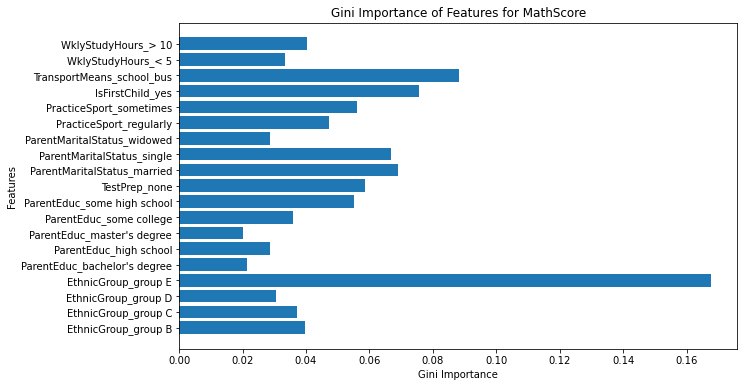

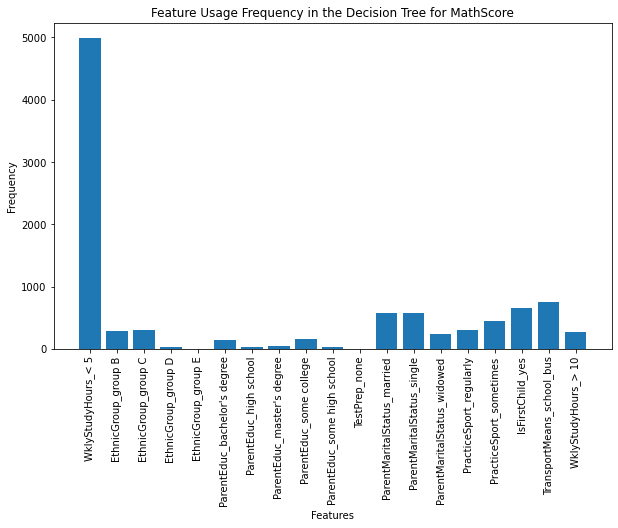

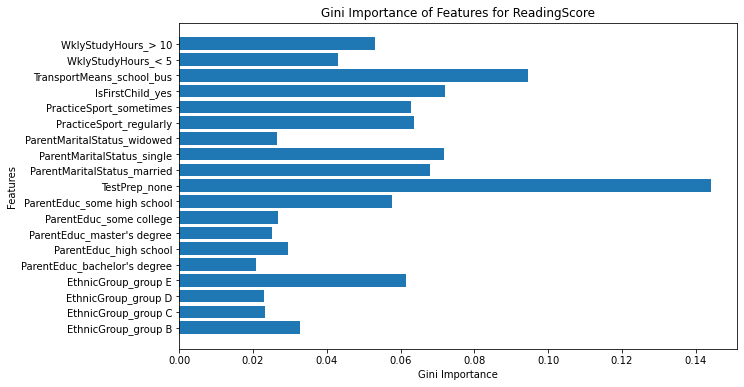

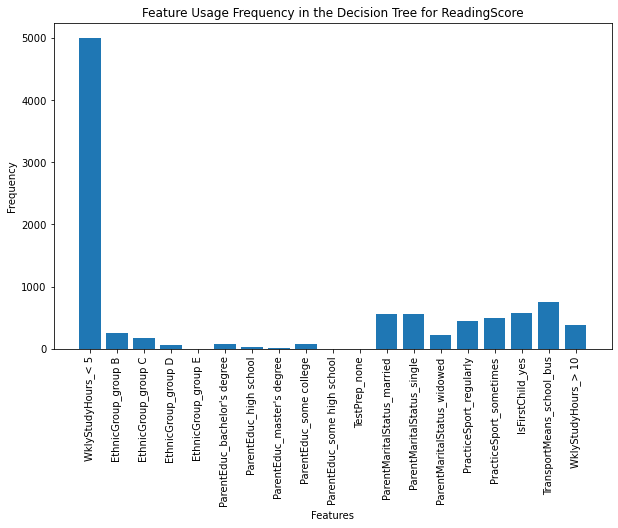

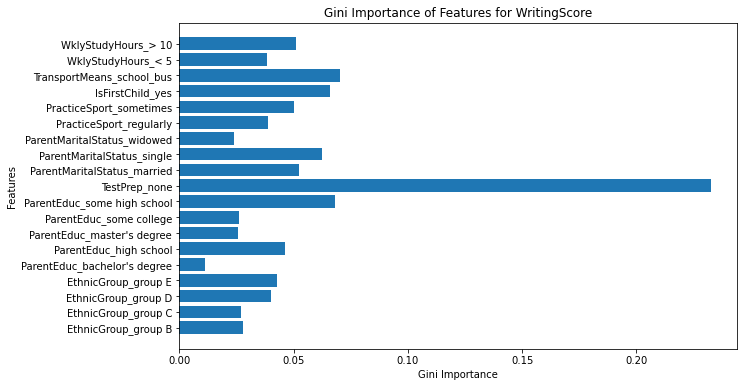

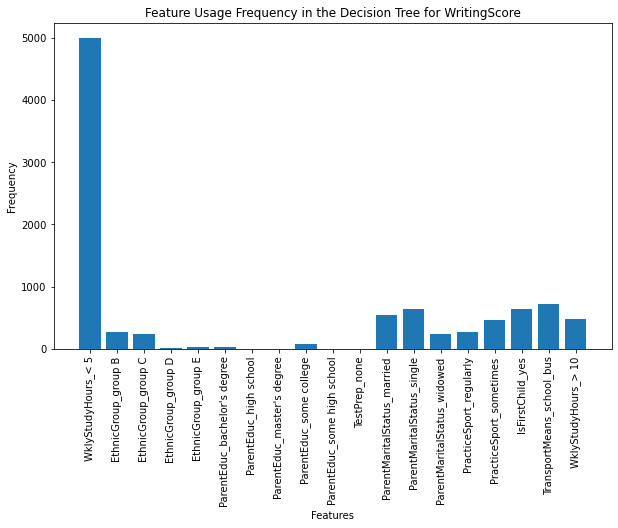

In [22]:
# Gini Importance for MathScore model
feature_names_math = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_math, feature_importances_math)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for MathScore')
plt.show()

# Feature Usage Frequency for MathScore model
node_counts_math = model_math.tree_.n_node_samples
feature_usages_math = pd.Series(model_math.tree_.feature, name='Feature Usage')
feature_usages_math = feature_usages_math.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_math[feature_usages_math.index], feature_usages_math.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for MathScore')
plt.xticks(rotation=90)
plt.show()

# Gini Importance for ReadingScore model
feature_names_reading = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_reading, feature_importances_reading)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for ReadingScore')
plt.show()

# Feature Usage Frequency for ReadingScore model
node_counts_reading = model_reading.tree_.n_node_samples
feature_usages_reading = pd.Series(model_reading.tree_.feature, name='Feature Usage')
feature_usages_reading = feature_usages_reading.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_reading[feature_usages_reading.index], feature_usages_reading.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for ReadingScore')
plt.xticks(rotation=90)
plt.show()

# Gini Importance for WritingScore model
feature_names_writing = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names_writing, feature_importances_writing)
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Gini Importance of Features for WritingScore')
plt.show()

# Feature Usage Frequency for WritingScore model
node_counts_writing = model_writing.tree_.n_node_samples
feature_usages_writing = pd.Series(model_writing.tree_.feature, name='Feature Usage')
feature_usages_writing = feature_usages_writing.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(feature_names_writing[feature_usages_writing.index], feature_usages_writing.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Usage Frequency in the Decision Tree for WritingScore')
plt.xticks(rotation=90)
plt.show()


## Cross Tabulation

- Really this is somewhat irrelevant to add here (or in any notebook becuase we removed the "other" column types which means we will not see the representaion of the data in the "other" group becuase it is all imputed or removed already. With this in mind, so that we can visualize the NAN in the cross-tabulation we will create an NAN group so that we can see if the NAN has any value in the data. (yes this means it will look the same in each book). 

- Also know that the response variable had to be created from Pass/Fail since our normal response is continous var. 

In [23]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

In [24]:
df.fillna("NAN_DATA", inplace = True)

In [25]:
# create a function for the mentioned feature above
def pass_fail(score):
    if score >= 70:
        return "Pass"
    else:
        return "Fail"

In [26]:
df["MathResult"] = df["MathScore"].apply(pass_fail)

In [27]:
df["ReadingResult"] = df["ReadingScore"].apply(pass_fail)


In [28]:
df["WritingResult"] = df["WritingScore"].apply(pass_fail)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          30641 non-null  object
 2   ParentEduc           30641 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             30641 non-null  object
 5   ParentMaritalStatus  30641 non-null  object
 6   PracticeSport        30641 non-null  object
 7   IsFirstChild         30641 non-null  object
 8   NrSiblings           30641 non-null  object
 9   TransportMeans       30641 non-null  object
 10  WklyStudyHours       30641 non-null  object
 11  MathScore            30641 non-null  int64 
 12  ReadingScore         30641 non-null  int64 
 13  WritingScore         30641 non-null  int64 
 14  MathResult           30641 non-null  object
 15  ReadingResult        30641 non-null  object
 16  Writ

In [30]:
# Cross-Tab - MATH

cross_tab = pd.crosstab(df['WklyStudyHours'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['MathResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['MathResult'], dropna=False)
print("\n",cross_tab)


 MathResult      Fail  Pass
WklyStudyHours            
5 - 10          9031  7215
< 5             5102  3136
> 10            2600  2602
NAN_DATA         527   428 


 MathResult      Fail  Pass
TransportMeans            
NAN_DATA        1799  1335
private         6404  4958
school_bus      9057  7088 


 MathResult  Fail  Pass
NrSiblings            
0.0         1739  1346
1.0         4608  3609
2.0         3836  2954
3.0         3406  2717
4.0         1703  1238
5.0          753   567
6.0          178   124
7.0          154   137
NAN_DATA     883   689 


 MathResult     Fail  Pass
IsFirstChild             
NAN_DATA        502   402
no             6087  4568
yes           10671  8411 


 MathResult     Fail  Pass
PracticeSport            
NAN_DATA        365   266
never          2503  1501
regularly      5682  5111
sometimes      8710  6503 


 MathResult           Fail  Pass
ParentMaritalStatus            
NAN_DATA              676   514
divorced             2746  2173
married       

In [31]:
# Cross-Tab - READING

cross_tab = pd.crosstab(df['WklyStudyHours'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['ReadingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['ReadingResult'], dropna=False)
print("\n",cross_tab)


 ReadingResult   Fail  Pass
WklyStudyHours            
5 - 10          7962  8284
< 5             4400  3838
> 10            2414  2788
NAN_DATA         477   478 


 ReadingResult   Fail  Pass
TransportMeans            
NAN_DATA        1610  1524
private         5610  5752
school_bus      8033  8112 


 ReadingResult  Fail  Pass
NrSiblings               
0.0            1525  1560
1.0            4129  4088
2.0            3358  3432
3.0            3016  3107
4.0            1490  1451
5.0             648   672
6.0             155   147
7.0             141   150
NAN_DATA        791   781 


 ReadingResult  Fail  Pass
IsFirstChild             
NAN_DATA        467   437
no             5376  5279
yes            9410  9672 


 ReadingResult  Fail  Pass
PracticeSport            
NAN_DATA        327   304
never          2102  1902
regularly      5189  5604
sometimes      7635  7578 


 ReadingResult        Fail  Pass
ParentMaritalStatus            
NAN_DATA              602   588
divorced     

In [32]:
# Cross-Tab - WRITING

cross_tab = pd.crosstab(df['WklyStudyHours'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TransportMeans'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['IsFirstChild'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['PracticeSport'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['ParentMaritalStatus'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['NrSiblings'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['Gender'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['EthnicGroup'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['LunchType'], df['WritingResult'], dropna=False)
print("\n",cross_tab,"\n")

cross_tab = pd.crosstab(df['TestPrep'], df['WritingResult'], dropna=False)
print("\n",cross_tab)


 WritingResult   Fail  Pass
WklyStudyHours            
5 - 10          8397  7849
< 5             4581  3657
> 10            2528  2674
NAN_DATA         480   475 


 WritingResult   Fail  Pass
TransportMeans            
NAN_DATA        1695  1439
private         5903  5459
school_bus      8388  7757 


 WritingResult  Fail  Pass
NrSiblings               
0.0            1603  1482
1.0            4322  3895
2.0            3508  3282
3.0            3162  2961
4.0            1572  1369
5.0             677   643
6.0             164   138
7.0             152   139
NAN_DATA        826   746 


 WritingResult  Fail  Pass
IsFirstChild             
NAN_DATA        478   426
no             5608  5047
yes            9900  9182 


 WritingResult  Fail  Pass
PracticeSport            
NAN_DATA        336   295
never          2246  1758
regularly      5357  5436
sometimes      8047  7166 


 WritingResult        Fail  Pass
ParentMaritalStatus            
NAN_DATA              633   557
divorced     